# Types of encoding
### Encoding categorical variables

In [1]:
# Nominal encoding (gender,state; donot worry about order)
# Ordinal encoding (Degree(phd,mtech,btech); order matters now)

# Nominal Encoding

In [2]:
# one hot encoding
# one hot encoding with many categorical variable
# mean encoding

# Ordinal encoding

In [3]:
# label encoding
# target guided ordinal encoding

# one hot encoding

In [4]:
# n categories ---> n columns
# one of them 1 and rest 0

# dummy variable trap : we have to delete one of the columns while doing one hot encoding, why ???
# well, if we know n-1 column values and we know they all add upto 1 and one of them is 1, then we know the value of the last column also
# i.e. if all n-1 columns have 0 as value then last column must have 1

In [5]:
# but when we have many categorical features like 100 columns, then due to high dimension our calculation gets tougher
# so we avoid one hot encoding in that case

# Label Encoding

In [6]:
 # categorical features are given numbers like ....5,4,3,2,1 depending on their importance
 # phd -4, mtech-3,btech-2 ...   

# One hot encoding with multiple categories

In [7]:
# ensemble technique to reduce dimensions
# then apply one hot encoding

# Target guided ordinal encoding

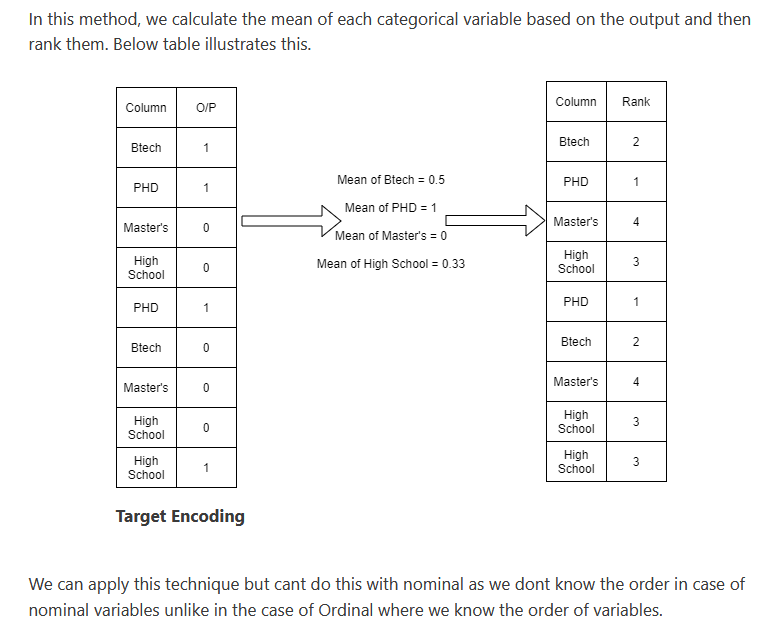

In [8]:
from PIL import Image
img=Image.open(r'C:\Users\fffmm\Desktop\Statistics & ML algo\Feature Engineering\target.png')
img

# mean encoding

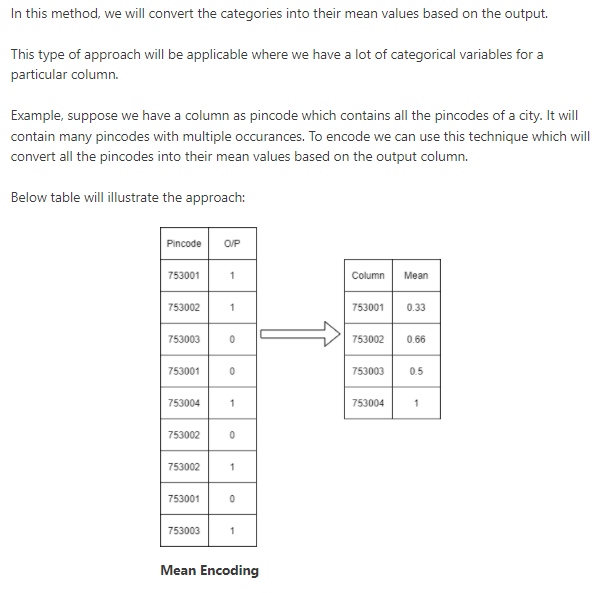

In [9]:
img1=Image.open('mean.png')
img1

# One hot encoding with multiple categories

In [10]:
# One hot encoding with multiple categories
import pandas as pd
import numpy as np

In [11]:
data1=pd.read_csv(r'C:\Users\fffmm\Desktop\Statistics & ML algo\Feature Engineering\mercedes-benz-greener-manufacturing\train.csv\train.csv')

In [12]:
data1.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data=pd.read_csv(r'C:\Users\fffmm\Desktop\Statistics & ML algo\Feature Engineering\mercedes-benz-greener-manufacturing\train.csv\train.csv',usecols=['X1','X2','X3','X4','X5','X6'])

In [14]:
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [15]:
# these 6 features have these many unique categories in them
for col in data.columns:
    print(col,':', len(data[col].unique()), 'labels')

X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels
X6 : 12 labels


In [16]:
27+44+7+4+29+12

123

In [17]:
# let's examine how many columns , we will obtain after one hot encoding these 6 variables
pd.get_dummies(data,drop_first=True).shape

(4209, 117)

In [18]:
# so after dropping one feature we get 117 columns

In [19]:
# lets find the top 20 most frequent categories for the variable X2
data.X2.value_counts().sort_values(ascending=False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z       19
Name: X2, dtype: int64

In [20]:
# lets make a list with the most frequent categories of the variable
top_10=[x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [21]:
# and now we will do one hot encoding in basic way, when we find our top 10 feature_label give 1, else 0

for label in top_10:
    data[label]=np.where(data['X2']==label,1,0)
    
data[['X2']+top_10].head(40)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [22]:
def one_hot_top_x(df,variable,top_x_labels):
    
    for label in top_x_labels:
        df[variable+'_'+label]=np.where(data[variable]==label,1,0)

data=pd.read_csv(r'C:\Users\fffmm\Desktop\Statistics & ML algo\Feature Engineering\mercedes-benz-greener-manufacturing\train.csv\train.csv',usecols=['X1','X2','X3','X4','X5','X6'])
        
one_hot_top_x(data,'X2',top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


In [23]:
# so along with 6 features we are adding 10 more features for X2 and we will drop X2,X1... eventually after adding the features

In [24]:
top_10=[x for x in data.X1.value_counts().sort_values(ascending=False).head(10).index]

one_hot_top_x(data,'X1',top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
# simmilar thing can be done for X3, X4...

# though we are adding columns but we are adding very less number of columns wrt what it would add if we do one hot encoding

# Handling categorical features many categories( count / frequency encoding)

In [26]:
df=pd.read_csv(r'C:\Users\fffmm\Desktop\Statistics & ML algo\Feature Engineering\mercedes-benz-greener-manufacturing\train.csv\train.csv',usecols=['X1','X2'])
df.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


In [27]:
df.shape

(4209, 2)

In [28]:
# one hot encoding

In [29]:
pd.get_dummies(df).shape

(4209, 71)

In [30]:
len(df['X1'].unique())

27

In [31]:
len(df['X2'].unique())

44

In [32]:
for col in df.columns[0:]:
    print(col,':',len(df[col].unique()),'labels')

X1 : 27 labels
X2 : 44 labels


In [33]:
df.X2.value_counts()

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z       19
d       18
ac      13
g       12
ap      11
y       11
x       10
aw       8
at       6
h        6
al       5
an       5
q        5
av       4
ah       4
p        4
au       3
am       1
j        1
af       1
l        1
aa       1
c        1
o        1
ar       1
Name: X2, dtype: int64

In [34]:
df.X2.value_counts().to_dict()

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'k': 25,
 'i': 25,
 'b': 21,
 'ao': 20,
 'ag': 19,
 'z': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'ap': 11,
 'y': 11,
 'x': 10,
 'aw': 8,
 'at': 6,
 'h': 6,
 'al': 5,
 'an': 5,
 'q': 5,
 'av': 4,
 'ah': 4,
 'p': 4,
 'au': 3,
 'am': 1,
 'j': 1,
 'af': 1,
 'l': 1,
 'aa': 1,
 'c': 1,
 'o': 1,
 'ar': 1}

In [35]:
df_frequency_map=df.X2.value_counts().to_dict()

In [36]:
df.X2=df.X2.map(df_frequency_map)
df.head()

,X1,X2
0,v,6
1,t,4
2,w,137
3,t,137
4,v,137


In [37]:
# in place of 'n', we have n's frequency and simmilarly for others for feature X2

# Handling ordinal categorical values

In [38]:
import pandas as pd
import datetime

In [39]:
df_base=datetime.datetime.today()
df_date_list=[df_base - datetime.timedelta(days=x) for x in range(0,20)]
df = pd.DataFrame(df_date_list)
df.columns=['day']
df

,day
0,2021-12-22 10:13:33.729866
1,2021-12-21 10:13:33.729866
2,2021-12-20 10:13:33.729866
3,2021-12-19 10:13:33.729866
4,2021-12-18 10:13:33.729866
5,2021-12-17 10:13:33.729866
6,2021-12-16 10:13:33.729866
7,2021-12-15 10:13:33.729866
8,2021-12-14 10:13:33.729866
9,2021-12-13 10:13:33.729866


In [40]:
# extract weekday name
df['day_of_week'] = df['day'].dt.day_name()
df.head()

,day,day_of_week
0,2021-12-22 10:13:33.729866,Wednesday
1,2021-12-21 10:13:33.729866,Tuesday
2,2021-12-20 10:13:33.729866,Monday
3,2021-12-19 10:13:33.729866,Sunday
4,2021-12-18 10:13:33.729866,Saturday


In [41]:
# engineer categorical variable by ordinal number replacement

weekday_map={'Monday':1,
             'Tuesday':2,
             'Wednesday':3,
             'Thursday':4,
             'Friday':5,
             'Saturday':6,
             'Sunday':7
            }
df['day_ordinal']=df.day_of_week.map(weekday_map)
df.head(20)

,day,day_of_week,day_ordinal
0,2021-12-22 10:13:33.729866,Wednesday,3
1,2021-12-21 10:13:33.729866,Tuesday,2
2,2021-12-20 10:13:33.729866,Monday,1
3,2021-12-19 10:13:33.729866,Sunday,7
4,2021-12-18 10:13:33.729866,Saturday,6
5,2021-12-17 10:13:33.729866,Friday,5
6,2021-12-16 10:13:33.729866,Thursday,4
7,2021-12-15 10:13:33.729866,Wednesday,3
8,2021-12-14 10:13:33.729866,Tuesday,2
9,2021-12-13 10:13:33.729866,Monday,1
